# Show different time zones as labels in a graph

In step 3 of this document, a piece of code was created to allow the x-axis of a graph to show two different time zones for each value. 

## 1. Create a dataframe to use as an example

In [6]:
import pandas as pd
import numpy as np

#Create a random dataframe that has time columns, one column for each time zone:
np.random.seed(0)
Etimes = [] #List of Eastern Time times
Ntimes = [] #List of Nairobi Time times
#Fill the lists with times in 24hr format (Nairobi Time = Eastern Time + 8)
for t in range(5): 
    hour = np.random.randint(24)
    Etimes.append('{}:{}'.format(str(hour).zfill(2),'00'))
    if hour >= 16:
        hour = (hour+8) - 24
        Ntimes.append('{}:{}'.format(str(hour).zfill(2),'00'))
    else:
        Ntimes.append('{}:{}'.format(str(hour+8).zfill(2),'00'))
    
#Create the dataframe
df = pd.DataFrame({'id':[str(x).zfill(3) for x in range(1,6)],
                   'num_points':np.random.randint(100,size=5),
                   'Eastern_Time':Etimes,
                   'Nairobi_Time':Ntimes})

#Sort Eastern Time times in ascending order
df = df.sort_values(by=['Eastern_Time']).reset_index().drop('index',axis=1) 
df 

,id,num_points,Eastern_Time,Nairobi_Time
0,004,21,00:00,08:00
1,005,36,03:00,11:00
2,001,67,12:00,20:00
3,002,9,15:00,23:00
4,003,83,21:00,05:00


## 2. Problem

The x-axis of the following graph only displays the values of one of the time columns as labels, in this case it only displays the Eastern Time times:

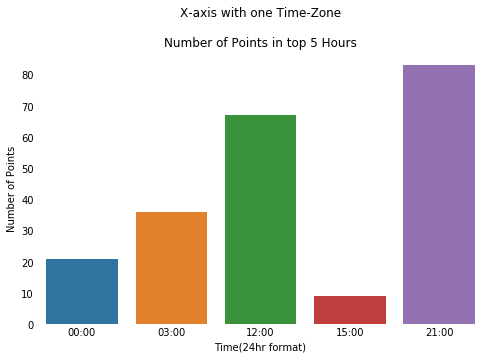

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Create plot
plt.figure(figsize=(8,5))
ax = sns.barplot(x='Eastern_Time', 
                 y='num_points',
                 data=df)
sns.despine(left=True,bottom=True)
ax.set(xlabel='Time(24hr format)', ylabel='Number of Points')
plt.title('Number of Points in top 5 Hours')
plt.tick_params(axis='both', which='both',length=0)
plt.show()

## 3. Solution

Create a 'labels' list with labels containing the two time zones for each value. 

In [3]:
labels = []
#Get the two times from the dataframe
Etimes = df['Eastern_Time']
Ntimes = df['Nairobi_Time']
#append values to list
for h in range(len(df['num_points'])):
    #format the string as required
    labels.append('{} ET\n{} NT'.format(Etimes[h],
                                        Ntimes[h]))

## 4. Plot again

The 'labels' list created in the step before wil be used as an argument for the .set_xticklabels() method, a seaborn method that overrides the label names for the x-axis.

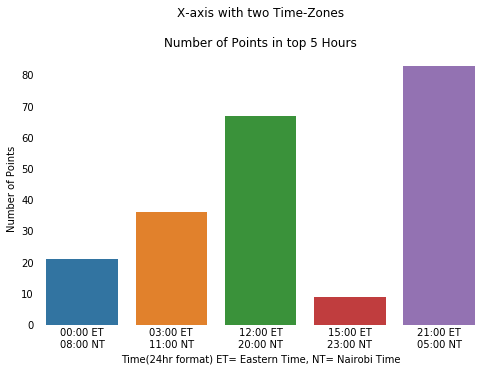

In [14]:
#Create plot
plt.figure(figsize=(8,5))
ax = sns.barplot(x='Eastern_Time', 
                 y='num_points',
                 data=df)
sns.despine(left=True,bottom=True)
ax.set(xlabel='Time(24hr format) ET= Eastern Time, NT= Nairobi Time', 
       ylabel='Number of Points')
plt.title('Number of Points in top 5 Hours')
plt.tick_params(axis='both', which='both',length=0)
ax.set_xticklabels(labels) #set_xticklabels() method using the solution in step 3 as argument
plt.show()

Now the x-axis labels show both time zones for the same value.